In [ ]:
pip install chart-studio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 858.4 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs,init_notebook_mode ,plot,iplot
init_notebook_mode(connected=True)

In [ ]:
tesla = pd.read_csv("/content/tesla.csv")


In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
import pandas as pd

# Corrected file path (choose one of the options)
tesla = pd.read_csv(r"/content/tesla.csv")  # Using raw string
# tesla = pd.read_csv("C:\\Users\\hp\\Desktop\\Collection\\tesla.csv")  # Using double backslashes
# tesla = pd.read_csv("C:/Users/hp/Desktop/Collection/tesla.csv")  # Using forward slashes

# Correcting the typo in the function name
tesla['Date'] = pd.to_datetime(tesla['Date'])

# Display the first few rows of the dataframe
print(tesla.head())

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


<ipython-input-15-cdf4088b59e5>:9: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total days == {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total days == 3181 days


In [ ]:
tesla.describe()


,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


In [ ]:
print(tesla.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


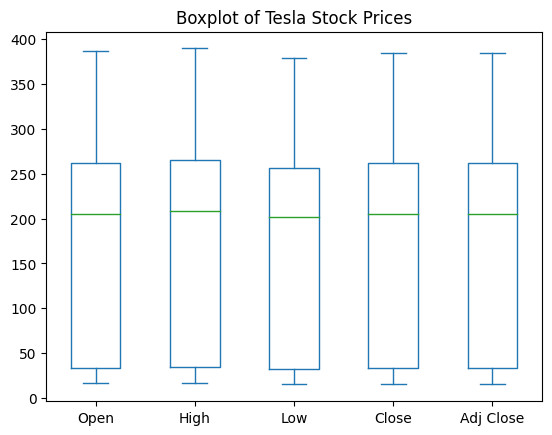

In [ ]:


# Ensure the correct column names
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Check if these columns exist in the DataFrame
for col in columns_to_plot:
    if col not in tesla.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame")

# Plot the boxplot
tesla[columns_to_plot].plot(kind='box')
plt.title('Boxplot of Tesla Stock Prices')
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Load the CSV file
tesla = pd.read_csv(r"/content/tesla.csv")

# Print column names to verify
print(tesla.columns)

# Trim any extra spaces in column names
tesla.columns = tesla.columns.str.strip()

# Ensure the correct column names are used
# Assuming the correct column name is 'Date'
tesla['Date'] = pd.to_datetime(tesla['Date'])

# Define the layout
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Define the data
tesla_data = [go.Scatter(
    x=tesla['Date'],
    y=tesla['Close'],
    mode='lines',
    name='Tesla Stock Price'
)]

# Create the figure
fig = go.Figure(data=tesla_data, layout=layout)

# Plot the figure in the notebook
pyo.iplot(fig)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<ipython-input-11-0ddf2f12c355>:16: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'tesla' is your DataFrame and it has been defined previously
X = np.array(tesla.index).reshape(-1, 1)
Y = tesla['Close']

# Correcting the typo in the function name
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Scaling the training data
scaler = StandardScaler().fit(X_train)


In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)



In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression

# Assuming 'X_train', 'X_test', 'Y_train', and 'Y_test' have been defined previously
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Generate predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Create the actual data trace
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)

# Create the predicted line trace
trace1 = go.Scatter(
    x=X_train.T[0],
    y=Y_train_pred,
    mode='lines',
    name='Predicted'
)

# Create the layout for the plot
layout = go.Layout(
    title='Training Data Scatter Plot with Predicted Line',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Close Price')
)

# Combine the traces and layout into a figure
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Plot the figure
pyo.iplot(fig)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing import MinMaxScalar
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


SyntaxError: invalid syntax (<ipython-input-25-fac4ba27eb52>, line 4)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error as mse

# Assuming 'lm' is your trained LinearRegression model, and 'X_train', 'X_test', 'Y_train', and 'Y_test' are defined

# Calculate scores
r2_train = r2_score(Y_train, lm.predict(X_train))
r2_test = r2_score(Y_test, lm.predict(X_test))
mse_train = mse(Y_train, lm.predict(X_train))
mse_test = mse(Y_test, lm.predict(X_test))

# Format the output using f-strings with 5 decimal places
scores = (
    f"{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}\n"
    f"{'r2_score'.ljust(10)}{r2_train:^20.5f}{r2_test:^20.5f}\n"
    f"{'MSE'.ljust(10)}{mse_train:^20.5f}{mse_test:^20.5f}\n"
)

print(scores)


Metric           Train                Test        
r2_score        0.86589             0.86106       
MSE            1821.38339          1780.98754     



In [ ]:
pip install scikit-learn


In [ ]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [ ]:
data=pd.read_csv('/content/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')

In [ ]:
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
trainData = sc.fit_transform(trainData)
print(trainData.shape)


(1149, 1)


In [ ]:
x_train=[]
y_train=[]

for i in range(60,1149):
  x_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

(1535, 1)

In [ ]:
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Ensure the number of samples in X_train and y_train match
num_samples = min(X_train.shape[0], y_train.shape[0])
X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

# Now both X_train and y_train have the same number of samples
# Train the model
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)



Epoch 1/20
33/33 - 9s - loss: 0.1175 - 9s/epoch - 263ms/step
Epoch 2/20
33/33 - 0s - loss: 0.0737 - 252ms/epoch - 8ms/step
Epoch 3/20
33/33 - 0s - loss: 0.0737 - 245ms/epoch - 7ms/step
Epoch 4/20
33/33 - 0s - loss: 0.0733 - 256ms/epoch - 8ms/step
Epoch 5/20
33/33 - 0s - loss: 0.0733 - 257ms/epoch - 8ms/step
Epoch 6/20
33/33 - 0s - loss: 0.0746 - 269ms/epoch - 8ms/step
Epoch 7/20
33/33 - 0s - loss: 0.0739 - 259ms/epoch - 8ms/step
Epoch 8/20
33/33 - 0s - loss: 0.0731 - 270ms/epoch - 8ms/step
Epoch 9/20
33/33 - 0s - loss: 0.0728 - 278ms/epoch - 8ms/step
Epoch 10/20
33/33 - 0s - loss: 0.0733 - 282ms/epoch - 9ms/step
Epoch 11/20
33/33 - 0s - loss: 0.0725 - 265ms/epoch - 8ms/step
Epoch 12/20
33/33 - 0s - loss: 0.0738 - 266ms/epoch - 8ms/step
Epoch 13/20
33/33 - 0s - loss: 0.0732 - 264ms/epoch - 8ms/step
Epoch 14/20
33/33 - 0s - loss: 0.0724 - 264ms/epoch - 8ms/step
Epoch 15/20
33/33 - 0s - loss: 0.0723 - 260ms/epoch - 8ms/step
Epoch 16/20
33/33 - 0s - loss: 0.0720 - 263ms/epoch - 8ms/step
Ep

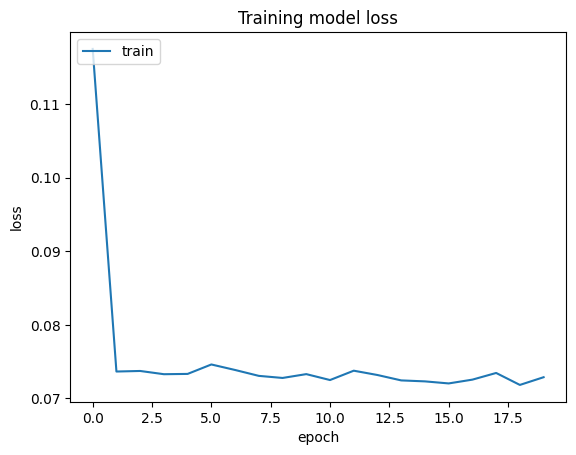

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()



In [ ]:
y_pred=model.predict(X_test)
y_pred



6/6 [==============================] - 0s 57ms/step


array([[[0.4608813 ],
        [0.92471653],
        [1.3333886 ],
        ...,
        [2.6253607 ],
        [2.6253614 ],
        [2.6253617 ]],

       [[0.4608813 ],
        [0.9247165 ],
        [1.3333886 ],
        ...,
        [2.6253607 ],
        [2.6253612 ],
        [2.6253617 ]],

       [[0.46088126],
        [0.9247165 ],
        [1.3333886 ],
        ...,
        [2.6253607 ],
        [2.6253612 ],
        [2.6253617 ]],

       ...,

       [[0.46088126],
        [0.9247163 ],
        [1.3333884 ],
        ...,
        [2.6253607 ],
        [2.6253612 ],
        [2.6253617 ]],

       [[0.46088126],
        [0.9247163 ],
        [1.3333883 ],
        ...,
        [2.6253605 ],
        [2.6253612 ],
        [2.6253617 ]],

       [[0.46088126],
        [0.9247162 ],
        [1.3333883 ],
        ...,
        [2.6253607 ],
        [2.6253614 ],
        [2.6253617 ]]], dtype=float32)

In [ ]:
import pandas as pd

# Read the test data
testData = pd.read_csv('/content/Google_test_data.csv')

# Convert the "Close" column to numeric values
testData["Close"] = pd.to_numeric(testData["Close"], errors='coerce')

# Drop rows with missing values
testData = testData.dropna()

# Extract the "Close" column as the input data
inputClosing = testData.iloc[:, 4:5].values

# Scale the input data
inputClosing_scaled = sc.transform(inputClosing)

# Define the timestep and create input sequences
timestep = 60
X_test = []
length = len(testData)

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i - timestep:i, 0])

# Convert X_test to numpy array
X_test = np.array(X_test)

# Reshape X_test for LSTM input (batch_size, timesteps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Display the shape of X_test
print(X_test.shape)



(192, 60, 1)


In [ ]:
y_pred=model.predict(X_test)
y_pred

6/6 [==============================] - 1s 88ms/step


array([[[0.4608813 ],
        [0.92471653],
        [1.3333886 ],
        ...,
        [2.6253607 ],
        [2.6253614 ],
        [2.6253617 ]],

       [[0.4608813 ],
        [0.9247165 ],
        [1.3333886 ],
        ...,
        [2.6253607 ],
        [2.6253612 ],
        [2.6253617 ]],

       [[0.46088126],
        [0.9247165 ],
        [1.3333886 ],
        ...,
        [2.6253607 ],
        [2.6253612 ],
        [2.6253617 ]],

       ...,

       [[0.46088126],
        [0.9247163 ],
        [1.3333884 ],
        ...,
        [2.6253607 ],
        [2.6253612 ],
        [2.6253617 ]],

       [[0.46088126],
        [0.9247163 ],
        [1.3333883 ],
        ...,
        [2.6253605 ],
        [2.6253612 ],
        [2.6253617 ]],

       [[0.46088126],
        [0.9247162 ],
        [1.3333883 ],
        ...,
        [2.6253607 ],
        [2.6253614 ],
        [2.6253617 ]]], dtype=float32)